In [1]:
#  Copyright 2022 Shailendra Bhandari Github link: https://github.com/Shailendra995/Final_Project_MachineLearning.git
#
#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at
#
#        http://www.apache.org/licenses/LICENSE-2.0
#
#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.

# Detecting Falls with Wearable Sensors

In [3]:
import pandas as pd
from sklearn import tree
import numpy as np
import graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score  #The F-beta score is the weighted harmonic mean
#of precision and recall, reaching its optimal value at 1 and its worst value at 0.
import numpy as np
from time import time
from IPython.display import display
baseDir='data/FallDataSet' #Directory for data set

def export_decision_tree(clf, feature_names):
    dot_data = tree.export_graphviz(clf,
                                    out_file=None,
                                    feature_names=feature_names,
                                    class_names=['not survived', 'survived'],
                                    filled=True)
    return graphviz.Source(dot_data)

## Data input

In [2]:
from falldetection.feature_extractor import FeatureExtractor 
df = FeatureExtractor.sensor_file_2_df('/media/shailendra/New Volume/Master_Data_Science_Oslo_met/Second_Sem/Machine_learning/Final_project/newProject/data/FallDataSet/101/Testler Export/901/Test_1/340535.txt')
df.head()

,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z
155,9.737897,1.062179,0.791073,-0.017405,0.002575,-0.005722,-0.816650,0.521729,0.022461
156,9.753418,1.071167,0.784302,-0.025940,0.003099,0.005341,-0.816650,0.521729,0.022461
157,9.707761,1.046896,0.803351,-0.019455,0.017548,0.002670,-0.816650,0.521729,0.019775
158,9.765625,1.071167,0.752258,-0.040627,0.018358,0.002861,-0.814209,0.521729,0.019531
159,9.820127,1.035285,0.733662,-0.043821,0.021172,0.001335,-0.816650,0.521729,0.019775


In [3]:
#Importing data from the relevant DLA

from falldetection.sensor import Sensor 
from falldetection.sensor_files_provider import SensorFilesProvider
from falldetection.sensor_files_to_exclude import get_sensor_files_to_exclude_for
from falldetection.fall_predicate import isFall

def get_sensor_files(baseDir, sensor, sensor_file_filter):
    def get_sensor_files():
        return createSensorFilesProvider().provide_sensor_files()

    def createSensorFilesProvider():
        return SensorFilesProvider(baseDir, sensor, get_sensor_files_to_exclude_for(sensor))

    return list(filter(sensor_file_filter, get_sensor_files()))

fall_sensor_files = get_sensor_files(baseDir, Sensor.RIGHT_THIGH, isFall)
non_fall_sensor_files = get_sensor_files(baseDir, Sensor.RIGHT_THIGH, lambda sensor_file: not isFall(sensor_file))

In [4]:
# plotting different activies like fall/ non fall and so on (Data visualization)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from falldetection.feature_extractor import FeatureExtractor

def get_total_acceleration(df):
    return np.sqrt(df['Acc_X'] ** 2 + df['Acc_Y'] ** 2 + df['Acc_Z'] ** 2)

def reindex(series):
    return pd.Series(series.values, name='total_acceleration', index=pd.Index(np.arange(-50, 51, 1)))

def get_reindexed_total_acceleration(sensor_file):
    return reindex(get_total_acceleration(FeatureExtractor.sensor_file_2_df(sensor_file)))

def get_total_accelerations(sensor_files):
    return list(map(get_reindexed_total_acceleration, sensor_files))

def set_labels():
    plt.xlabel('Time (s)',fontsize = 15, fontweight='bold')  # ('Time (1/25 s)')
    plt.ylabel('Total acceleration ($m/s^2$)',fontsize = 15, fontweight='bold')    

def plot_total_accelerations(sensor_files):
    total_accelerations = get_total_accelerations(sensor_files)
    ax = sns.lineplot(data=total_accelerations, ci='sd', legend=True)
    set_labels()
    
def plot_individual_total_accelerations(sensor_files):    
    def set_individual_names(total_accelerations):
        for counter, total_acceleration in enumerate(total_accelerations):
            total_acceleration.name = 'Total_acceleration' + str(counter)
        
    total_accelerations = get_total_accelerations(sensor_files)
    set_individual_names(total_accelerations)
    ax = sns.lineplot(data=total_accelerations, dashes=False, legend=True)
    
    set_labels()

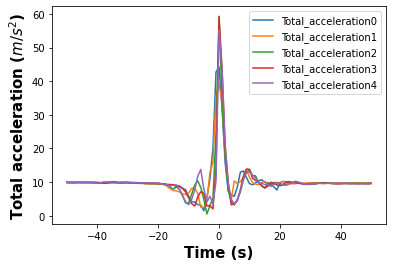

In [5]:
plot_individual_total_accelerations(fall_sensor_files[:5])
plt.savefig('images/some_fall_total_accelerations.pdf')
plt.show()

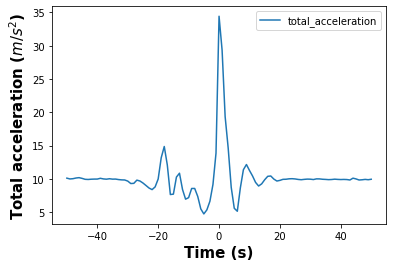

In [6]:
plot_total_accelerations(fall_sensor_files)
plt.savefig('images/fall_total_accelerations.pdf')

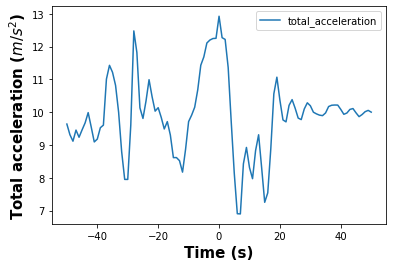

In [7]:
plot_total_accelerations(non_fall_sensor_files)
plt.savefig('images/non_fall_total_accelerations.pdf')

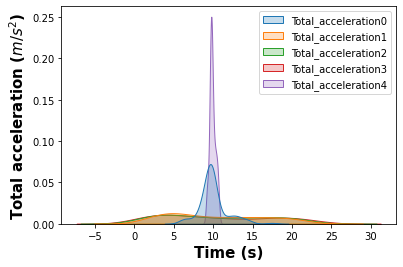

In [8]:
# plotting different activies like fall/ non fall and so on (Data visualization)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from falldetection.feature_extractor import FeatureExtractor

def get_total_acceleration(df):
    return np.sqrt(df['Acc_X'] ** 2 + df['Acc_Y'] ** 2 + df['Acc_Z'] ** 2)

def reindex(series):
    return pd.Series(series.values, name='total_acceleration', index=pd.Index(np.arange(-50, 51, 1)))

def get_reindexed_total_acceleration(sensor_file):
    return reindex(get_total_acceleration(FeatureExtractor.sensor_file_2_df(sensor_file)))

def get_total_accelerations(sensor_files):
    return list(map(get_reindexed_total_acceleration, sensor_files))

def set_labels():
    plt.xlabel('Time (s)', fontsize = 15, fontweight='bold')  # ('Time (1/25 s)'
    plt.ylabel('Total acceleration ($m/s^2$)', fontsize =15, fontweight='bold')    

def plot_total_accelerations(sensor_files):
    total_accelerations = get_total_accelerations(sensor_files)
    ax = sns.lineplot(data=total_accelerations, ci='sd', legend=True)
    set_labels()
    
def plot_individual_total_accelerations(sensor_files):    
    def set_individual_names(total_accelerations):
        for counter, total_acceleration in enumerate(total_accelerations):
            total_acceleration.name = 'Total_acceleration' + str(counter)
        
    total_accelerations = get_total_accelerations(sensor_files)
    set_individual_names(total_accelerations)
    #ax = sns.lineplot(data=total_accelerations, dashes=False, legend=True)
    ax =sns.kdeplot(data=total_accelerations , shade=True)
    set_labels()

plot_individual_total_accelerations(non_fall_sensor_files[:5])
plt.savefig('images/some_non_fall_total_accelerations.pdf')

In [9]:
#sensor on right thigh and waist
from falldetection.sensor import Sensor

csv_file_by_sensor = {Sensor.RIGHT_THIGH: 'data/features_right_thigh.csv', Sensor.WAIST: 'data/features_waist.csv'}
csv_file = csv_file_by_sensor[Sensor.RIGHT_THIGH]

In [10]:
import os
from falldetection.feature_extractor_workflow import extract_features_and_save, FeatureExtractorWorkflow

def create_extracted_features_file(csv_file, sensor):
    if not os.path.isfile(csv_file):
        extract_features_and_save(sensor=sensor,
                                  baseDir=baseDir,
                                  csv_file=csv_file,
                                  autocovar_num=11,
                                  dft_amplitudes_num=0)

create_extracted_features_file(csv_file_by_sensor[Sensor.RIGHT_THIGH], Sensor.RIGHT_THIGH)
create_extracted_features_file(csv_file_by_sensor[Sensor.WAIST], Sensor.WAIST)

In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

data = pd.read_csv(csv_file, index_col=0)

# Success - Display the first record
display(data.head())    #n=as many as needed

,sensorFile,fall,Acc_X_min,Acc_X_max,Acc_X_mean,Acc_X_var,Acc_X_skew,Acc_X_kurtosis,Acc_X_autocovar_lag_1,Acc_X_autocovar_lag_2,Acc_X_autocovar_lag_3,Acc_X_autocovar_lag_4,Acc_X_autocovar_lag_5,Acc_X_autocovar_lag_6,Acc_X_autocovar_lag_7,Acc_X_autocovar_lag_8,Acc_X_autocovar_lag_9,Acc_X_autocovar_lag_10,Acc_X_autocovar_lag_11,Acc_Y_min,Acc_Y_max,Acc_Y_mean,Acc_Y_var,Acc_Y_skew,Acc_Y_kurtosis,Acc_Y_autocovar_lag_1,Acc_Y_autocovar_lag_2,Acc_Y_autocovar_lag_3,Acc_Y_autocovar_lag_4,Acc_Y_autocovar_lag_5,Acc_Y_autocovar_lag_6,Acc_Y_autocovar_lag_7,Acc_Y_autocovar_lag_8,Acc_Y_autocovar_lag_9,Acc_Y_autocovar_lag_10,Acc_Y_autocovar_lag_11,Acc_Z_min,Acc_Z_max,Acc_Z_mean,Acc_Z_var,Acc_Z_skew,Acc_Z_kurtosis,Acc_Z_autocovar_lag_1,Acc_Z_autocovar_lag_2,Acc_Z_autocovar_lag_3,Acc_Z_autocovar_lag_4,Acc_Z_autocovar_lag_5,Acc_Z_autocovar_lag_6,Acc_Z_autocovar_lag_7,Acc_Z_autocovar_lag_8,Acc_Z_autocovar_lag_9,Acc_Z_autocovar_lag_10,Acc_Z_autocovar_lag_11,Gyr_X_min,Gyr_X_max,Gyr_X_mean,Gyr_X_var,Gyr_X_skew,Gyr_X_kurtosis,Gyr_X_autocovar_lag_1,Gyr_X_autocovar_lag_2,Gyr_X_autocovar_lag_3,Gyr_X_autocovar_lag_4,Gyr_X_autocovar_lag_5,Gyr_X_autocovar_lag_6,Gyr_X_autocovar_lag_7,Gyr_X_autocovar_lag_8,Gyr_X_autocovar_lag_9,Gyr_X_autocovar_lag_10,Gyr_X_autocovar_lag_11,Gyr_Y_min,Gyr_Y_max,Gyr_Y_mean,Gyr_Y_var,Gyr_Y_skew,Gyr_Y_kurtosis,Gyr_Y_autocovar_lag_1,Gyr_Y_autocovar_lag_2,Gyr_Y_autocovar_lag_3,Gyr_Y_autocovar_lag_4,Gyr_Y_autocovar_lag_5,Gyr_Y_autocovar_lag_6,Gyr_Y_autocovar_lag_7,Gyr_Y_autocovar_lag_8,Gyr_Y_autocovar_lag_9,Gyr_Y_autocovar_lag_10,Gyr_Y_autocovar_lag_11,Gyr_Z_min,Gyr_Z_max,Gyr_Z_mean,Gyr_Z_var,Gyr_Z_skew,Gyr_Z_kurtosis,Gyr_Z_autocovar_lag_1,Gyr_Z_autocovar_lag_2,Gyr_Z_autocovar_lag_3,Gyr_Z_autocovar_lag_4,Gyr_Z_autocovar_lag_5,Gyr_Z_autocovar_lag_6,Gyr_Z_autocovar_lag_7,Gyr_Z_autocovar_lag_8,Gyr_Z_autocovar_lag_9,Gyr_Z_autocovar_lag_10,Gyr_Z_autocovar_lag_11,Mag_X_min,Mag_X_max,Mag_X_mean,Mag_X_var,Mag_X_skew,Mag_X_kurtosis,Mag_X_autocovar_lag_1,Mag_X_autocovar_lag_2,Mag_X_autocovar_lag_3,Mag_X_autocovar_lag_4,Mag_X_autocovar_lag_5,Mag_X_autocovar_lag_6,Mag_X_autocovar_lag_7,Mag_X_autocovar_lag_8,Mag_X_autocovar_lag_9,Mag_X_autocovar_lag_10,Mag_X_autocovar_lag_11,Mag_Y_min,Mag_Y_max,Mag_Y_mean,Mag_Y_var,Mag_Y_skew,Mag_Y_kurtosis,Mag_Y_autocovar_lag_1,Mag_Y_autocovar_lag_2,Mag_Y_autocovar_lag_3,Mag_Y_autocovar_lag_4,Mag_Y_autocovar_lag_5,Mag_Y_autocovar_lag_6,Mag_Y_autocovar_lag_7,Mag_Y_autocovar_lag_8,Mag_Y_autocovar_lag_9,Mag_Y_autocovar_lag_10,Mag_Y_autocovar_lag_11,Mag_Z_min,Mag_Z_max,Mag_Z_mean,Mag_Z_var,Mag_Z_skew,Mag_Z_kurtosis,Mag_Z_autocovar_lag_1,Mag_Z_autocovar_lag_2,Mag_Z_autocovar_lag_3,Mag_Z_autocovar_lag_4,Mag_Z_autocovar_lag_5,Mag_Z_autocovar_lag_6,Mag_Z_autocovar_lag_7,Mag_Z_autocovar_lag_8,Mag_Z_autocovar_lag_9,Mag_Z_autocovar_lag_10,Mag_Z_autocovar_lag_11
0,data/FallDataSet/101/Testler Export/802/Test_4...,False,4.597473,16.176939,9.371301,2.628580,0.911441,3.541434,1.678807,0.151347,-0.739682,-0.957049,-0.825571,-0.361732,-0.021460,-0.094988,-0.376303,-0.570615,-0.613772,-3.427529,2.119994,-0.398477,1.197303,-0.501028,0.529118,0.878305,0.416364,0.126367,-0.030061,-0.056597,0.054419,0.089898,0.003392,-0.015369,0.069596,0.051978,0.998425,6.542873,3.035454,1.145468,0.374688,0.594420,0.959414,0.663527,0.366912,0.115107,0.007818,-0.018418,-0.028478,-0.076136,-0.160418,-0.220864,-0.199297,-0.729733,0.768550,-0.025268,0.096762,-0.150801,0.162428,0.080819,0.050844,0.021899,-0.000659,-0.011707,-0.013646,-0.010212,-0.003578,0.001283,0.002531,-0.001399,-0.775762,0.326210,0.022363,0.055121,-1.294349,1.285619,0.047757,0.032257,0.014440,-0.002138,-0.016557,-0.026447,-0.030416,-0.029336,-0.023301,-0.013017,0.000388,-0.451152,0.435264,-0.005884,0.027069,-0.119397,0.957447,0.022928,0.015783,0.010556,0.006781,0.002913,-0.000350,-0.002034,-0.003398,-0.005706,-0.007947,-0.009021,-0.775146,-0.618164,-0.683018,0.001454,-0.121862,-0.060797,0.001413,0.001349,0.001264,0.001164,0.001059,0.000952,0.000849,0.000754,0.000674,0.000604,0.000544,-

In [12]:
n_records = len(data)

n_fall = len(data[data['fall'] == True])
n_adl = len(data[data['fall'] == False])

def fall_percent(y):
    return (len(y[y == True]) / len(y)) * 100    

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of falls: {}".format(n_fall))
print("Number of Activities of Daily Life: {}".format(n_adl))
print("Percentage of falls: {:.2f}%".format(fall_percent(data['fall'])))
print("Percentage of Activities of Daily Life: {:.2f}%".format(100 - fall_percent(data['fall'])))

Total number of records: 1570
Number of falls: 910
Number of Activities of Daily Life: 660
Percentage of falls: 57.96%
Percentage of Activities of Daily Life: 42.04%


In [13]:
y_feature = data['fall']
X_feature = data.drop(columns=['fall', 'sensorFile'])
X_feature.head()

,Acc_X_min,Acc_X_max,Acc_X_mean,Acc_X_var,Acc_X_skew,Acc_X_kurtosis,Acc_X_autocovar_lag_1,Acc_X_autocovar_lag_2,Acc_X_autocovar_lag_3,Acc_X_autocovar_lag_4,Acc_X_autocovar_lag_5,Acc_X_autocovar_lag_6,Acc_X_autocovar_lag_7,Acc_X_autocovar_lag_8,Acc_X_autocovar_lag_9,Acc_X_autocovar_lag_10,Acc_X_autocovar_lag_11,Acc_Y_min,Acc_Y_max,Acc_Y_mean,Acc_Y_var,Acc_Y_skew,Acc_Y_kurtosis,Acc_Y_autocovar_lag_1,Acc_Y_autocovar_lag_2,Acc_Y_autocovar_lag_3,Acc_Y_autocovar_lag_4,Acc_Y_autocovar_lag_5,Acc_Y_autocovar_lag_6,Acc_Y_autocovar_lag_7,Acc_Y_autocovar_lag_8,Acc_Y_autocovar_lag_9,Acc_Y_autocovar_lag_10,Acc_Y_autocovar_lag_11,Acc_Z_min,Acc_Z_max,Acc_Z_mean,Acc_Z_var,Acc_Z_skew,Acc_Z_kurtosis,Acc_Z_autocovar_lag_1,Acc_Z_autocovar_lag_2,Acc_Z_autocovar_lag_3,Acc_Z_autocovar_lag_4,Acc_Z_autocovar_lag_5,Acc_Z_autocovar_lag_6,Acc_Z_autocovar_lag_7,Acc_Z_autocovar_lag_8,Acc_Z_autocovar_lag_9,Acc_Z_autocovar_lag_10,Acc_Z_autocovar_lag_11,Gyr_X_min,Gyr_X_max,Gyr_X_mean,Gyr_X_var,Gyr_X_skew,Gyr_X_kurtosis,Gyr_X_autocovar_lag_1,Gyr_X_autocovar_lag_2,Gyr_X_autocovar_lag_3,Gyr_X_autocovar_lag_4,Gyr_X_autocovar_lag_5,Gyr_X_autocovar_lag_6,Gyr_X_autocovar_lag_7,Gyr_X_autocovar_lag_8,Gyr_X_autocovar_lag_9,Gyr_X_autocovar_lag_10,Gyr_X_autocovar_lag_11,Gyr_Y_min,Gyr_Y_max,Gyr_Y_mean,Gyr_Y_var,Gyr_Y_skew,Gyr_Y_kurtosis,Gyr_Y_autocovar_lag_1,Gyr_Y_autocovar_lag_2,Gyr_Y_autocovar_lag_3,Gyr_Y_autocovar_lag_4,Gyr_Y_autocovar_lag_5,Gyr_Y_autocovar_lag_6,Gyr_Y_autocovar_lag_7,Gyr_Y_autocovar_lag_8,Gyr_Y_autocovar_lag_9,Gyr_Y_autocovar_lag_10,Gyr_Y_autocovar_lag_11,Gyr_Z_min,Gyr_Z_max,Gyr_Z_mean,Gyr_Z_var,Gyr_Z_skew,Gyr_Z_kurtosis,Gyr_Z_autocovar_lag_1,Gyr_Z_autocovar_lag_2,Gyr_Z_autocovar_lag_3,Gyr_Z_autocovar_lag_4,Gyr_Z_autocovar_lag_5,Gyr_Z_autocovar_lag_6,Gyr_Z_autocovar_lag_7,Gyr_Z_autocovar_lag_8,Gyr_Z_autocovar_lag_9,Gyr_Z_autocovar_lag_10,Gyr_Z_autocovar_lag_11,Mag_X_min,Mag_X_max,Mag_X_mean,Mag_X_var,Mag_X_skew,Mag_X_kurtosis,Mag_X_autocovar_lag_1,Mag_X_autocovar_lag_2,Mag_X_autocovar_lag_3,Mag_X_autocovar_lag_4,Mag_X_autocovar_lag_5,Mag_X_autocovar_lag_6,Mag_X_autocovar_lag_7,Mag_X_autocovar_lag_8,Mag_X_autocovar_lag_9,Mag_X_autocovar_lag_10,Mag_X_autocovar_lag_11,Mag_Y_min,Mag_Y_max,Mag_Y_mean,Mag_Y_var,Mag_Y_skew,Mag_Y_kurtosis,Mag_Y_autocovar_lag_1,Mag_Y_autocovar_lag_2,Mag_Y_autocovar_lag_3,Mag_Y_autocovar_lag_4,Mag_Y_autocovar_lag_5,Mag_Y_autocovar_lag_6,Mag_Y_autocovar_lag_7,Mag_Y_autocovar_lag_8,Mag_Y_autocovar_lag_9,Mag_Y_autocovar_lag_10,Mag_Y_autocovar_lag_11,Mag_Z_min,Mag_Z_max,Mag_Z_mean,Mag_Z_var,Mag_Z_skew,Mag_Z_kurtosis,Mag_Z_autocovar_lag_1,Mag_Z_autocovar_lag_2,Mag_Z_autocovar_lag_3,Mag_Z_autocovar_lag_4,Mag_Z_autocovar_lag_5,Mag_Z_autocovar_lag_6,Mag_Z_autocovar_lag_7,Mag_Z_autocovar_lag_8,Mag_Z_autocovar_lag_9,Mag_Z_autocovar_lag_10,Mag_Z_autocovar_lag_11
0,4.597473,16.176939,9.371301,2.628580,0.911441,3.541434,1.678807,0.151347,-0.739682,-0.957049,-0.825571,-0.361732,-0.021460,-0.094988,-0.376303,-0.570615,-0.613772,-3.427529,2.119994,-0.398477,1.197303,-0.501028,0.529118,0.878305,0.416364,0.126367,-0.030061,-0.056597,0.054419,0.089898,0.003392,-0.015369,0.069596,0.051978,0.998425,6.542873,3.035454,1.145468,0.374688,0.594420,0.959414,0.663527,0.366912,0.115107,0.007818,-0.018418,-0.028478,-0.076136,-0.160418,-0.220864,-0.199297,-0.729733,0.768550,-0.025268,0.096762,-0.150801,0.162428,0.080819,0.050844,0.021899,-0.000659,-0.011707,-0.013646,-0.010212,-0.003578,0.001283,0.002531,-0.001399,-0.775762,0.326210,0.022363,0.055121,-1.294349,1.285619,0.047757,0.032257,0.014440,-0.002138,-0.016557,-0.026447,-0.030416,-0.029336,-0.023301,-0.013017,0.000388,-0.451152,0.435264,-0.005884,0.027069,-0.119397,0.957447,0.022928,0.015783,0.010556,0.006781,0.002913,-0.000350,-0.002034,-0.003398,-0.005706,-0.007947,-0.009021,-0.775146,-0.618164,-0.683018,0.001454,-0.121862,-0.060797,0.001413,0.001349,0.001264,0.001164,0.001059,0.000952,0.000849,0.000754,0.000674,0.000604,0.000544,-0.607910,-0.523682,-0.565306,0.000378,0.613932,-0.679603,0.000350,0.0003

In [14]:
#information of the data set
from sklearn.model_selection import train_test_split

X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X_feature,y_feature,test_size=0.2,random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_feature_train.shape[0]))
print("Testing set has {} samples.".format(X_feature_test.shape[0]))
    
print("Percentage of train falls: {:.2f}%".format(fall_percent(y_feature_train)))
print("Percentage of test falls: {:.2f}%".format(fall_percent(y_feature_test)))

Training set has 1256 samples.
Testing set has 314 samples.
Percentage of train falls: 58.92%
Percentage of test falls: 54.14%


### always fall classifier, always adl classifier and random classifier

In [15]:
always_fall_prediction = np.array([True]*len(X_feature_test))
always_adl_prediction = np.array([False]*len(X_feature_test))

In [16]:
from sklearn.metrics import accuracy_score

random_prediction = np.random.choice([True, False], len(X_feature_test))

print("accuracy_score(always_fall_prediction): {0:.0f}%".format(accuracy_score(y_feature_test, always_fall_prediction) * 100))
print("accuracy_score(always_adl_prediction): {0:.0f}%".format(accuracy_score(y_feature_test, always_adl_prediction) * 100))
print("accuracy_score(random_prediction): {0:.0f}%".format(accuracy_score(y_feature_test, random_prediction) * 100))

accuracy_score(always_fall_prediction): 54%
accuracy_score(always_adl_prediction): 46%
accuracy_score(random_prediction): 51%


### GaussianNB

In [17]:
from sklearn.decomposition import PCA  #PCA = Principal componebt analysis

pca = PCA(n_components=1).fit(X_feature_train)

In [18]:
print("{0:.0f}% variance in the data is explained by the first principal component.".format(pca.explained_variance_ratio_[0] * 100))

99% variance in the data is explained by the first principal component.


In [19]:
#import visuals as vs
#pca_results = vs.pca_results(X_feature_train, pca)

In [20]:
#pca_results.sort_values(by='Dimension 1', axis=1, ascending=False)

In [21]:
X_feature_train_Acc_Z_var = X_feature_train[['Acc_Z_var']]
X_feature_test_Acc_Z_var = X_feature_test[['Acc_Z_var']]

In [22]:
from sklearn.naive_bayes import GaussianNB

benchmark_clf = GaussianNB().fit(X_feature_train_Acc_Z_var, y_feature_train)
benchmark_score = accuracy_score(y_feature_test, benchmark_clf.predict(X_feature_test_Acc_Z_var))
print("{0:.0f}%".format(benchmark_score * 100))

68%


So the benchmark is a GaussianNB classifier yielding an accuracy of about the above obtained results...%.

## Data Preprocessing
### Standard Machine Learning Classifiers

### LSTM Recurrent Neural Networks

In [23]:
from falldetection.time_series_extractor_workflow import extract_time_series
from falldetection.sensor import Sensor

X_raw, y_raw = extract_time_series(
    sensor=Sensor.RIGHT_THIGH,
    baseDir=baseDir,
    columns=['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z'])


## Standard Machine Learning Classifiers

,Classifier,Score
0,SVC,0.949045
1,DecisionTree,0.987261
2,Random Forest,1.000000
3,K Neighbors,1.000000


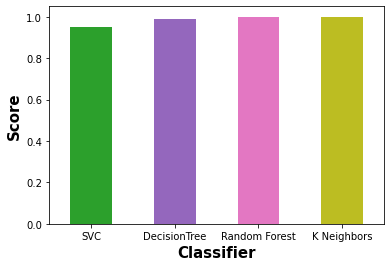

In [24]:
import pandas as pd
import visuals as vs
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def train_predict_multiple(classifiers, X_train, y_train, X_test, y_test, scorer):
    def train_predict(classifier):
        classifier = classifier.fit(X_train, y_train)
        return scorer(y_test, classifier.predict(X_test))

    results = {'Classifier': list(classifiers.keys()),
               'Score': list(map(train_predict, classifiers.values()))}
    return pd.DataFrame(results).sort_values(by='Score', ascending=True)

def plot_training_results(df):
    ax = df.plot.bar(x='Classifier', y='Score', color=['C2', 'C4', 'C6', 'C8'], legend=False, rot=0)
    ax.set_xlabel('Classifier',fontsize = 15, fontweight='bold')
    ax.set_ylabel('Score',fontsize = 15, fontweight='bold')
    #ax.axhline(y=benchmark_score,xmin=-0.1,xmax=5.0,linewidth=2,color='r',linestyle='dashed')


classifiers = {'SVC': SVC(random_state=0),
               'DecisionTree': DecisionTreeClassifier(random_state=0),
               'Random Forest': RandomForestClassifier(random_state=0),
               'K Neighbors': KNeighborsClassifier(n_neighbors=3)}

df = train_predict_multiple(classifiers,X_feature_train,y_feature_train,X_feature_test,y_feature_test,scorer=accuracy_score)

plot_training_results(df)
plt.savefig('images/scoresByClassifier.pdf')
display(df)

### LSTM Recurrent Neural Networks

In [25]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers import ConvLSTM1D
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import TimeDistributed
from keras.layers import Dropout
from numpy import array
# Importing libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

2022-05-13 20:12:31.791615: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shailendra/rsoftware/root/lib/:/home/shailendra/rsoftware/root/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib/:/home/shailendra/geant4/geant4.10.05.p01-build/BuildProducts/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/usr/lib/x86_64-linux-gnu/usr/lib:/usr/local/lib:/Applications/autotools/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/home/shailendra/rsoftware/root/lib:/usr/local/lib:/usr/lib:/home/shailendra/anaroot/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib
2022-05-13 20:12:31.791645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:

from sklearn.model_selection import train_test_split

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_raw_train, X_raw_test, X_val, Y_val = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Initializing parameters
epochs = 100
batch_size = 64
n_hidden = 32
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))
timesteps = len(X_raw_train[0])
input_dim = len(X_raw_train[0][0])
n_classes = _count_classes(y_raw_train)
n_classes  = 1
print(timesteps)
print(input_dim)
print(len(X_raw_train))


101
9
1256


# Base Model

In [27]:

####Metrics have been removed from Keras core.
#You need to calculate them manually. They removed them on 2.0 version. Those metrics are all 
#global metrics, but Keras works in batches. As a result, it might be more misleading than helpful.

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# Initiliazing the sequential model
model = Sequential()
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()




2022-05-13 20:12:33.249951: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shailendra/rsoftware/root/lib/:/home/shailendra/rsoftware/root/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib/:/home/shailendra/geant4/geant4.10.05.p01-build/BuildProducts/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/usr/lib/x86_64-linux-gnu/usr/lib:/usr/local/lib:/Applications/autotools/lib:/home/shailendra/CLHEP/2.4.1.0-install/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib:/home/shailendra/rsoftware/root/lib:/usr/local/lib:/usr/lib:/home/shailendra/anaroot/lib:/home/shailendra/geant4/geant4.10.05.p01-install/lib
2022-05-13 20:12:33.249980: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-13 20:12:33.250000: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________


In [28]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True,to_file="images/basemodel.pdf", dpi=120)

In [29]:
# Training the model
hist = model.fit(X_raw_train,
          y_raw_train,
          batch_size=batch_size,
          validation_data=(X_raw_test, y_raw_test),
          epochs=epochs)

#hist = model.fit(X_raw_train,y_raw_train,batch_size=128,epochs=40,validation_data=(X_raw_test, y_raw_test))

Epoch 1/100
20/20 [==============================] - 3s 58ms/step - loss: 0.6717 - accuracy: 0.5987 - f1_m: 0.6540 - precision_m: 0.6550 - recall_m: 0.6559 - val_loss: 0.5281 - val_accuracy: 0.8185 - val_f1_m: 0.8402 - val_precision_m: 0.8701 - val_recall_m: 0.8152
Epoch 2/100
20/20 [==============================] - 1s 40ms/step - loss: 0.5375 - accuracy: 0.7556 - f1_m: 0.7815 - precision_m: 0.8119 - recall_m: 0.7559 - val_loss: 0.4508 - val_accuracy: 0.8408 - val_f1_m: 0.8616 - val_precision_m: 0.8792 - val_recall_m: 0.8476
Epoch 3/100
20/20 [==============================] - 1s 47ms/step - loss: 0.4904 - accuracy: 0.7898 - f1_m: 0.8125 - precision_m: 0.8388 - recall_m: 0.7911 - val_loss: 0.4056 - val_accuracy: 0.8503 - val_f1_m: 0.8700 - val_precision_m: 0.8805 - val_recall_m: 0.8630
Epoch 4/100
20/20 [==============================] - 1s 41ms/step - loss: 0.4334 - accuracy: 0.8320 - f1_m: 0.8500 - precision_m: 0.8693 - recall_m: 0.8354 - val_loss: 0.3688 - val_accuracy: 0.8631 - va

Epoch 32/100
20/20 [==============================] - 1s 39ms/step - loss: 0.1357 - accuracy: 0.9475 - f1_m: 0.9537 - precision_m: 0.9479 - recall_m: 0.9607 - val_loss: 0.1033 - val_accuracy: 0.9586 - val_f1_m: 0.9651 - val_precision_m: 0.9479 - val_recall_m: 0.9832
Epoch 33/100
20/20 [==============================] - 1s 38ms/step - loss: 0.1182 - accuracy: 0.9538 - f1_m: 0.9596 - precision_m: 0.9601 - recall_m: 0.9608 - val_loss: 0.0990 - val_accuracy: 0.9618 - val_f1_m: 0.9682 - val_precision_m: 0.9433 - val_recall_m: 0.9946
Epoch 34/100
20/20 [==============================] - 1s 38ms/step - loss: 0.1056 - accuracy: 0.9586 - f1_m: 0.9637 - precision_m: 0.9585 - recall_m: 0.9697 - val_loss: 0.0928 - val_accuracy: 0.9650 - val_f1_m: 0.9706 - val_precision_m: 0.9530 - val_recall_m: 0.9889
Epoch 35/100
20/20 [==============================] - 1s 38ms/step - loss: 0.0971 - accuracy: 0.9674 - f1_m: 0.9716 - precision_m: 0.9689 - recall_m: 0.9752 - val_loss: 0.0806 - val_accuracy: 0.9618 

Epoch 63/100
20/20 [==============================] - 1s 41ms/step - loss: 0.0253 - accuracy: 0.9944 - f1_m: 0.9956 - precision_m: 0.9961 - recall_m: 0.9952 - val_loss: 0.0228 - val_accuracy: 0.9936 - val_f1_m: 0.9946 - val_precision_m: 1.0000 - val_recall_m: 0.9893
Epoch 64/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0259 - accuracy: 0.9952 - f1_m: 0.9956 - precision_m: 0.9985 - recall_m: 0.9927 - val_loss: 0.0127 - val_accuracy: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 65/100
20/20 [==============================] - 1s 36ms/step - loss: 0.0361 - accuracy: 0.9912 - f1_m: 0.9918 - precision_m: 0.9893 - recall_m: 0.9947 - val_loss: 0.0728 - val_accuracy: 0.9745 - val_f1_m: 0.9783 - val_precision_m: 0.9579 - val_recall_m: 1.0000
Epoch 66/100
20/20 [==============================] - 1s 72ms/step - loss: 0.0593 - accuracy: 0.9857 - f1_m: 0.9873 - precision_m: 0.9910 - recall_m: 0.9843 - val_loss: 0.1501 - val_accuracy: 0.9618 

Epoch 94/100
20/20 [==============================] - 1s 38ms/step - loss: 0.0254 - accuracy: 0.9936 - f1_m: 0.9941 - precision_m: 0.9952 - recall_m: 0.9930 - val_loss: 0.0144 - val_accuracy: 0.9936 - val_f1_m: 0.9949 - val_precision_m: 0.9899 - val_recall_m: 1.0000
Epoch 95/100
20/20 [==============================] - 1s 37ms/step - loss: 0.0158 - accuracy: 0.9960 - f1_m: 0.9965 - precision_m: 0.9932 - recall_m: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9968 - val_f1_m: 0.9973 - val_precision_m: 0.9947 - val_recall_m: 1.0000
Epoch 96/100
20/20 [==============================] - 1s 38ms/step - loss: 0.0214 - accuracy: 0.9952 - f1_m: 0.9959 - precision_m: 0.9959 - recall_m: 0.9960 - val_loss: 0.0209 - val_accuracy: 0.9936 - val_f1_m: 0.9946 - val_precision_m: 1.0000 - val_recall_m: 0.9893
Epoch 97/100
20/20 [==============================] - 1s 37ms/step - loss: 0.0109 - accuracy: 0.9960 - f1_m: 0.9967 - precision_m: 0.9972 - recall_m: 0.9963 - val_loss: 0.0023 - val_accuracy: 1.0000 

In [30]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_raw_test, y_raw_test, verbose=1)

10/10 [==============================] - 0s 12ms/step - loss: 0.0404 - accuracy: 0.9904 - f1_m: 0.9922 - precision_m: 0.9847 - recall_m: 1.0000


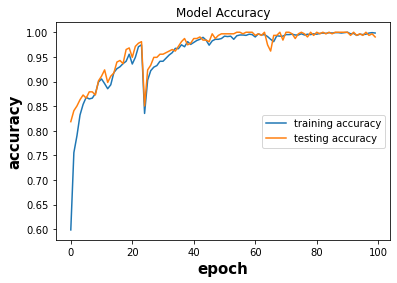

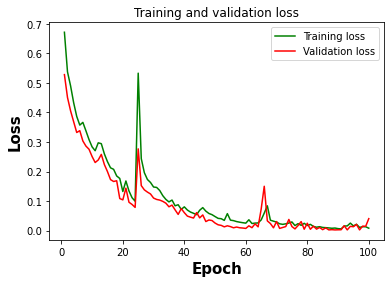

In [31]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy',fontsize=15, fontweight = 'bold')
plt.xlabel('epoch',fontsize=15, fontweight = 'bold')
plt.legend(['training accuracy', 'testing accuracy'], loc='center right')
plt.savefig('images/accuracybasemodel.pdf', dpi=200)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch',fontsize=15, fontweight = 'bold')
  plt.ylabel('Loss',fontsize=15, fontweight = 'bold')
  plt.legend(loc='upper right')
  plt.savefig('images/modelTVloss_model1.pdf', dpi=200) 
  plt.show()

plot_curves(hist)

# MultiLayer LSTM

In [32]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [33]:
# Initiliazing the sequential model
model1 = Sequential()
model1.add(LSTM(100,return_sequences=True,input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.5))
model1.add(LSTM(100,input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.6))
model1.add(Dense(n_classes, activation='sigmoid'))  #why sigmoid?? it is not a multiclass dataset
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])##why not categorical??? 
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 101, 100)          44000     
                                                                 
 dropout_1 (Dropout)         (None, 101, 100)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 124,501
Trainable params: 124,501
Non-trainable params: 0
_________________________________________________________________


In [34]:
import tensorflow as tf
tf.keras.utils.plot_model(model1, show_shapes=True,to_file="images/model_1.pdf", dpi=120)

In [35]:
# Training the model
hist = model1.fit(X_raw_train,
          y_raw_train,
          batch_size=32,
          validation_data=(X_raw_test, y_raw_test),
          epochs=epochs)

Epoch 1/100
40/40 [==============================] - 9s 167ms/step - loss: 0.4593 - accuracy: 0.8065 - f1_m: 0.8220 - precision_m: 0.8445 - recall_m: 0.8094 - val_loss: 0.3332 - val_accuracy: 0.8758 - val_f1_m: 0.8881 - val_precision_m: 0.9195 - val_recall_m: 0.8692
Epoch 2/100
40/40 [==============================] - 6s 150ms/step - loss: 0.3562 - accuracy: 0.8543 - f1_m: 0.8609 - precision_m: 0.8817 - recall_m: 0.8572 - val_loss: 0.2722 - val_accuracy: 0.8885 - val_f1_m: 0.9021 - val_precision_m: 0.9072 - val_recall_m: 0.9060
Epoch 3/100
40/40 [==============================] - 5s 122ms/step - loss: 0.2943 - accuracy: 0.8814 - f1_m: 0.8900 - precision_m: 0.8802 - recall_m: 0.9092 - val_loss: 0.2742 - val_accuracy: 0.8854 - val_f1_m: 0.9006 - val_precision_m: 0.8966 - val_recall_m: 0.9113
Epoch 4/100
40/40 [==============================] - 5s 115ms/step - loss: 0.2555 - accuracy: 0.8973 - f1_m: 0.9113 - precision_m: 0.9057 - recall_m: 0.9231 - val_loss: 0.2074 - val_accuracy: 0.9172 

Epoch 61/100
40/40 [==============================] - 7s 168ms/step - loss: 7.3803e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 1.8741e-05 - val_accuracy: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 62/100
40/40 [==============================] - 6s 143ms/step - loss: 7.2714e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 1.8014e-05 - val_accuracy: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 63/100
40/40 [==============================] - 5s 125ms/step - loss: 8.3004e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 1.7165e-05 - val_accuracy: 1.0000 - val_f1_m: 1.0000 - val_precision_m: 1.0000 - val_recall_m: 1.0000
Epoch 64/100
40/40 [==============================] - 5s 125ms/step - loss: 6.5480e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss

Epoch 91/100
40/40 [==============================] - 5s 124ms/step - loss: 0.2600 - accuracy: 0.9037 - f1_m: 0.9085 - precision_m: 0.9932 - recall_m: 0.8404 - val_loss: 0.2076 - val_accuracy: 0.9204 - val_f1_m: 0.9245 - val_precision_m: 0.9889 - val_recall_m: 0.8744
Epoch 92/100
40/40 [==============================] - 5s 123ms/step - loss: 0.2199 - accuracy: 0.9124 - f1_m: 0.9145 - precision_m: 0.9973 - recall_m: 0.8488 - val_loss: 0.1996 - val_accuracy: 0.9172 - val_f1_m: 0.9205 - val_precision_m: 1.0000 - val_recall_m: 0.8573
Epoch 93/100
40/40 [==============================] - 5s 125ms/step - loss: 0.2231 - accuracy: 0.9148 - f1_m: 0.9178 - precision_m: 0.9868 - recall_m: 0.8607 - val_loss: 0.1604 - val_accuracy: 0.9172 - val_f1_m: 0.9226 - val_precision_m: 0.9769 - val_recall_m: 0.8800
Epoch 94/100
40/40 [==============================] - 5s 121ms/step - loss: 0.1475 - accuracy: 0.9236 - f1_m: 0.9297 - precision_m: 0.9554 - recall_m: 0.9137 - val_loss: 0.1997 - val_accuracy: 0.9

In [36]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_raw_test, y_raw_test, verbose=1)

10/10 [==============================] - 0s 11ms/step - loss: 0.0404 - accuracy: 0.9904 - f1_m: 0.9922 - precision_m: 0.9847 - recall_m: 1.0000


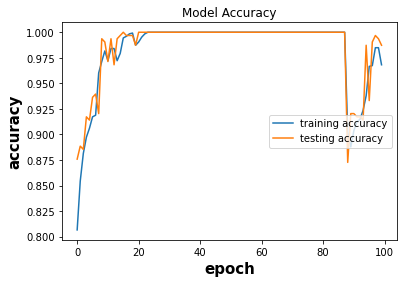

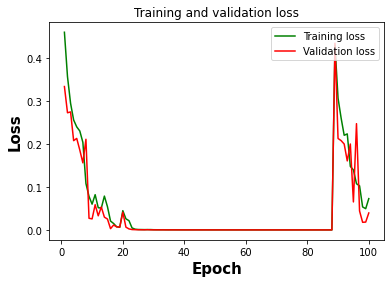

In [37]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy',fontsize=15, fontweight = 'bold')
plt.xlabel('epoch',fontsize=15, fontweight = 'bold')
plt.legend(['training accuracy', 'testing accuracy'], loc='center right')
plt.savefig('images/accuracyModel1.pdf', dpi=200)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch',fontsize=15, fontweight = 'bold')
  plt.ylabel('Loss',fontsize=15, fontweight = 'bold')
  plt.legend(loc='upper right')
  plt.savefig('images/modelTVloss_model2.pdf', dpi=200) 
  plt.show()

plot_curves(hist)

In [38]:
''''from keras.regularizers import l2  # dont yielded good outputs with regularization
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(128,recurrent_regularizer=l2(0.003),return_sequences=True,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))

model.add(LSTM(100,input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.6))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Training the model
hist = model.fit(X_raw_train,
          y_raw_train,
          batch_size=batch_size,
          validation_data=(X_raw_test, y_raw_test),
          epochs=epochs)

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('accuracy.pdf', dpi=200)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  #plt.savefig('modelTVloss.pdf', dpi=200) 
  plt.show()

plot_curves(hist)'''

"'from keras.regularizers import l2  # dont yielded good outputs with regularization\n# Initiliazing the sequential model\nmodel = Sequential()\n# Configuring the parameters\nmodel.add(LSTM(128,recurrent_regularizer=l2(0.003),return_sequences=True,input_shape=(timesteps, input_dim)))\n# Adding a dropout layer\nmodel.add(Dropout(0.5))\n\nmodel.add(LSTM(100,input_shape=(timesteps, input_dim)))\n# Adding a dropout layer\nmodel.add(Dropout(0.6))\n# Adding a dense output layer with sigmoid activation\nmodel.add(Dense(n_classes, activation='sigmoid'))\n\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.summary()\n\n# Training the model\nhist = model.fit(X_raw_train,\n          y_raw_train,\n          batch_size=batch_size,\n          validation_data=(X_raw_test, y_raw_test),\n          epochs=epochs)\n\n# summarize history for accuracy\nplt.plot(hist.history['accuracy'])\nplt.plot(hist.history['val_accuracy'])\nplt.title('Model Accuracy')\nplt.ylabel('

In [39]:
#####1-D Convolutional and LSTM together

data_dim = X_raw.shape[2] # = number of features = [{Acc_x, Acc_y, Acc_z, Gyr_*, Max_*, }] = 9
timesteps = X_raw.shape[1] # = 101 = (half_window_size:=50) * 2 + 1
num_classes = 1 # fall   (identifying fall_single class model) So we are using sigmoid activation and binary crossentropy
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=1, padding='same', activation='relu', input_shape=(timesteps, data_dim)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Conv1D(filters=128, kernel_size=1, padding='same', activation='relu', input_shape=(timesteps, data_dim)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(LSTM(128))
model2.add(Dense(num_classes, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
import tensorflow as tf
tf.keras.utils.plot_model(model2, show_shapes=True,to_file="images/model_2.pdf", dpi=120)

In [41]:
print(len(y_raw_test))
print(len(y_raw_test[y_raw_test == True])/len(y_raw_test))
print(len(y_raw_test[y_raw_test == False])/len(y_raw_test))

314
0.5859872611464968
0.4140127388535032


In [42]:
hist = model2.fit(X_raw_train,y_raw_train,batch_size=64,epochs=100,validation_data=(X_raw_test, y_raw_test))

Epoch 1/100
20/20 [==============================] - 3s 86ms/step - loss: 0.4312 - accuracy: 0.8057 - f1_m: 0.8194 - precision_m: 0.8487 - recall_m: 0.8131 - val_loss: 0.3172 - val_accuracy: 0.8599 - val_f1_m: 0.8750 - val_precision_m: 0.9030 - val_recall_m: 0.8514
Epoch 2/100
20/20 [==============================] - 1s 61ms/step - loss: 0.2805 - accuracy: 0.8766 - f1_m: 0.8900 - precision_m: 0.9233 - recall_m: 0.8686 - val_loss: 0.2073 - val_accuracy: 0.9013 - val_f1_m: 0.9124 - val_precision_m: 0.9314 - val_recall_m: 0.8955
Epoch 3/100
20/20 [==============================] - 1s 59ms/step - loss: 0.2370 - accuracy: 0.8997 - f1_m: 0.9100 - precision_m: 0.9422 - recall_m: 0.8845 - val_loss: 0.1695 - val_accuracy: 0.9299 - val_f1_m: 0.9387 - val_precision_m: 0.9342 - val_recall_m: 0.9438
Epoch 4/100
20/20 [==============================] - 1s 57ms/step - loss: 0.1340 - accuracy: 0.9467 - f1_m: 0.9528 - precision_m: 0.9678 - recall_m: 0.9405 - val_loss: 0.0926 - val_accuracy: 0.9650 - va

Epoch 32/100
20/20 [==============================] - 1s 57ms/step - loss: 1.7838e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9968 - val_f1_m: 0.9971 - val_precision_m: 1.0000 - val_recall_m: 0.9943
Epoch 33/100
20/20 [==============================] - 1s 55ms/step - loss: 1.6734e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9968 - val_f1_m: 0.9971 - val_precision_m: 1.0000 - val_recall_m: 0.9943
Epoch 34/100
20/20 [==============================] - 1s 55ms/step - loss: 1.5736e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9968 - val_f1_m: 0.9971 - val_precision_m: 1.0000 - val_recall_m: 0.9943
Epoch 35/100
20/20 [==============================] - 1s 54ms/step - loss: 1.4898e-04 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0173 - val_a

20/20 [==============================] - 1s 56ms/step - loss: 2.7959e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9968 - val_f1_m: 0.9971 - val_precision_m: 1.0000 - val_recall_m: 0.9943
Epoch 93/100
20/20 [==============================] - 1s 54ms/step - loss: 2.7443e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9968 - val_f1_m: 0.9971 - val_precision_m: 1.0000 - val_recall_m: 0.9943
Epoch 94/100
20/20 [==============================] - 1s 56ms/step - loss: 2.6903e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9968 - val_f1_m: 0.9971 - val_precision_m: 1.0000 - val_recall_m: 0.9943
Epoch 95/100
20/20 [==============================] - 1s 54ms/step - loss: 2.6406e-05 - accuracy: 1.0000 - f1_m: 1.0000 - precision_m: 1.0000 - recall_m: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.99

In [43]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_raw_test, y_raw_test, verbose=1)

10/10 [==============================] - 0s 11ms/step - loss: 0.0404 - accuracy: 0.9904 - f1_m: 0.9922 - precision_m: 0.9847 - recall_m: 1.0000


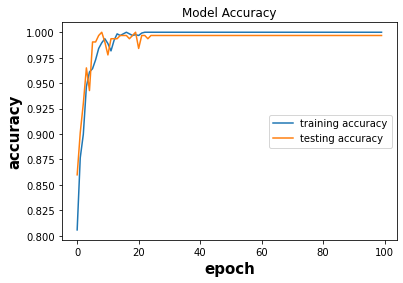

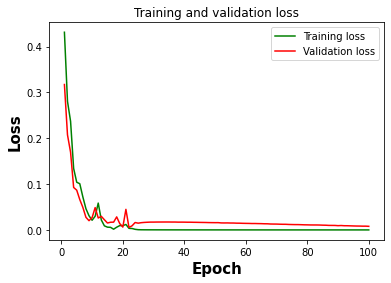

In [44]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy',fontsize=15, fontweight = 'bold')
plt.xlabel('epoch',fontsize=15, fontweight = 'bold')
plt.legend(['training accuracy', 'testing accuracy'], loc='center right')
plt.savefig('images/accuracymodel2.pdf', dpi=200)
plt.show()
# summarize history for loss
def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)


  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch',fontsize=15, fontweight = 'bold')
  plt.ylabel('Loss',fontsize=15, fontweight = 'bold')
  plt.legend(loc='upper right')
  plt.savefig('images/modelTVloss_model3.pdf', dpi=200) 
  plt.show()

plot_curves(hist)

In [45]:

scores = model.evaluate(X_raw_test, y_raw_test, verbose=1)
print("Accuracy_model: {:.2f}%".format(scores[1]*100))
scores, model.metrics_names

from sklearn.metrics import accuracy_score
#predictions = model.predict_classes(X_raw_test)  # this is outdated to version 2.5 and above for tensorflow
predictions = (model.predict(X_raw_test) > 0.5).astype("int32")
accuracy_score(y_raw_test, predictions)

10/10 [==============================] - 0s 11ms/step - loss: 0.0404 - accuracy: 0.9904 - f1_m: 0.9922 - precision_m: 0.9847 - recall_m: 1.0000
Accuracy_model: 99.04%


0.9904458598726115

In [46]:

scores = model1.evaluate(X_raw_test, y_raw_test, verbose=1)
print("Accuracy_model1: {:.2f}%".format(scores[1]*100))
scores, model1.metrics_names


from sklearn.metrics import accuracy_score
#predictions = model.predict_classes(X_raw_test)  # this is outdated to version 2.5 and above for tensorflow
predictions = (model1.predict(X_raw_test) > 0.5).astype("int32")
accuracy_score(y_raw_test, predictions)


10/10 [==============================] - 0s 35ms/step - loss: 0.0394 - accuracy: 0.9873 - f1_m: 0.9886 - precision_m: 0.9831 - recall_m: 0.9947
Accuracy_model1: 98.73%


0.9872611464968153

In [47]:
scores = model2.evaluate(X_raw_test, y_raw_test, verbose=1)
print("Accuracy_model2: {:.2f}%".format(scores[1]*100))
scores, model2.metrics_names


from sklearn.metrics import accuracy_score
#predictions = model.predict_classes(X_raw_test)  # this is outdated to version 2.5 and above for tensorflow
predictions = (model2.predict(X_raw_test) > 0.5).astype("int32")
accuracy_score(y_raw_test, predictions)

10/10 [==============================] - 0s 12ms/step - loss: 0.0079 - accuracy: 0.9968 - f1_m: 0.9973 - precision_m: 1.0000 - recall_m: 0.9947
Accuracy_model2: 99.68%


0.9968152866242038

In [48]:

""""#n_timesteps, n_features, n_outputs = X_raw.shape[2], X_raw.shape[1], 1

# the concept is same in this case:

data_dim = X_raw.shape[2] # = number of features = [{Acc_x, Acc_y, Acc_z, Gyr_*, Max_*, }] = 9
timesteps = X_raw.shape[1] # = 101 = (half_window_size:=50) * 2 + 1
num_classes = 1 # fall?


#second model 

model1 = Sequential()
model1.add(LSTM(128, input_shape=(timesteps, data_dim)))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='sigmoid'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model1.summary())"""


''''import tensorflow as tf
tf.keras.utils.plot_model(model1, show_shapes=True)


from sklearn.model_selection import train_test_split

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0)


import matplotlib.pyplot as plt

def plot_curves(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(1, len(loss) + 1)
  
  
  # fit network
batch_size =256
num_epochs = 50
validation_split = 0.20
#hist = model1.fit(X_raw_train, y_raw_train, batch_size=batch_size, validation_split=validation_split, epochs=num_epochs)
hist = model1.fit(X_raw_train,y_raw_train,batch_size=batch_size,epochs=num_epochs,validation_data=(X_raw_test, y_raw_test))

  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')

  plt.show()

plot_curves(hist)'''


"'import tensorflow as tf\ntf.keras.utils.plot_model(model1, show_shapes=True)\n\n\nfrom sklearn.model_selection import train_test_split\n\nX_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0)\n\n\nimport matplotlib.pyplot as plt\n\ndef plot_curves(hist):\n  loss = hist.history['loss']\n  val_loss = hist.history['val_loss']\n  epochs = range(1, len(loss) + 1)\n  \n  \n  # fit network\nbatch_size =256\nnum_epochs = 50\nvalidation_split = 0.20\n#hist = model1.fit(X_raw_train, y_raw_train, batch_size=batch_size, validation_split=validation_split, epochs=num_epochs)\nhist = model1.fit(X_raw_train,y_raw_train,batch_size=batch_size,epochs=num_epochs,validation_data=(X_raw_test, y_raw_test))\n\n  plt.figure()\n  plt.plot(epochs, loss, 'g', label='Training loss')\n  plt.plot(epochs, val_loss, 'r', label='Validation loss')\n  plt.title('Training and validation loss')\n  plt.xlabel('Epoch')\n  plt.ylabel('Loss')\n  plt.legend(loc='upper

In [49]:
#Refinement/standard machine learning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = KNeighborsClassifier(n_neighbors=3)
parameters = {'n_neighbors': [5, 6, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
grid_obj = GridSearchCV(clf,
                        param_grid=parameters,
                        scoring=make_scorer(accuracy_score),
                        cv=3)
grid_fit = grid_obj.fit(X_feature_train, y_feature_train)
best_clf = grid_fit.best_estimator_
predictions = (clf.fit(X_feature_train, y_feature_train)).predict(X_feature_test)
best_predictions = best_clf.predict(X_feature_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.2f}%".format(accuracy_score(y_feature_test, predictions) * 100))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.2f}%".format(accuracy_score(y_feature_test, best_predictions) * 100))
best_clf

Unoptimized model
------
Accuracy score on testing data: 100.00%

Optimized Model
------
Final accuracy score on the testing data: 99.68%


KNeighborsClassifier()

In [50]:
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier(random_state=120)
model.fit(X_feature_train, y_feature_train)

importances = model.feature_importances_

# Reduce the feature space
num_features = 68
X_feature_train_reduced = X_feature_train[X_feature_train.columns.values[(np.argsort(importances)[::-1])[:num_features]]]
X_feature_test_reduced = X_feature_test[X_feature_test.columns.values[(np.argsort(importances)[::-1])[:num_features]]]

clf = (clone(best_clf)).fit(X_feature_train_reduced, y_feature_train)

reduced_predictions = clf.predict(X_feature_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.2f}%".format(accuracy_score(y_feature_test, best_predictions) * 100))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.2f}%".format(accuracy_score(y_feature_test, reduced_predictions) * 100))

Final Model trained on full data
------
Accuracy on testing data: 99.68%

Final Model trained on reduced data
------
Accuracy on testing data: 99.04%


In [51]:
pca = PCA(n_components=68).fit(X_feature_train)
X_feature_train_pca = pca.transform(X_feature_train)
X_feature_test_pca = pca.transform(X_feature_test)

clf = (clone(best_clf)).fit(X_feature_train_pca, y_feature_train)

reduced_predictions = clf.predict(X_feature_test_pca)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.2f}%".format(accuracy_score(y_feature_test, best_predictions) * 100))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.2f}%".format(accuracy_score(y_feature_test, reduced_predictions) * 100))

Final Model trained on full data
------
Accuracy on testing data: 99.68%

Final Model trained on reduced data
------
Accuracy on testing data: 99.68%


In [52]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [53]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 1.0.1.


In [54]:
import keras
keras. __version__

'2.8.0'